## Simple Linear Regression 

Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has restaurants in various cities and you have data for profits and populations from the cities. 
You would like to use this data to help you identify which cities may potentially give youre business higer profits.
The dataset contains two columns. The first one is the population of a city and the second one is the profit of a food restaurant in that city. A negative value for profit indicates a loss.

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#### Load the dataset

In [2]:
data = pd.read_csv("../data/3_04/data.csv", header=None)   

print("Type and size of data: ", type(data), data.shape) 
data.columns = ["Profits", "Population per city"]
data.head(5) 

Type and size of data:  <class 'pandas.core.frame.DataFrame'> (97, 2)


,Profits,Population per city
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


#### Subdivide the dataset to feature (x) and target (y) sets

In [40]:
# loc gets rows/columns with particular labels. 
# iloc gets rows/columns at integer locations.

x = np.array(data.iloc[:,0]) # city population
y = np.array(data.iloc[:,1]) # average monthly profit 

print("Type and size of x: ", type(x), x.shape) 
print("Type and size of y: ", type(y), y.shape) 

Type and size of x:  <class 'numpy.ndarray'> (97,)
Type and size of y:  <class 'numpy.ndarray'> (97,)


#### Visualize feature (x) and target (y) sets

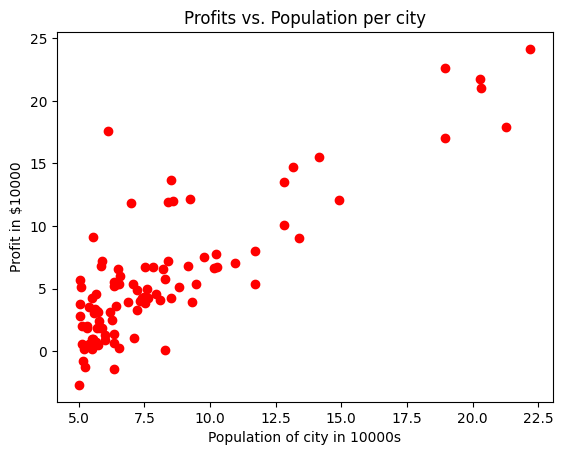

In [41]:
plt.scatter(x, y, marker='o', color='red')
plt.title("Profits vs. Population per city")
plt.ylabel("Profit in $10000")
plt.xlabel("Population of city in 10000s")
plt.show()

#### Subdivide x and y to train and test sets (80:20 split)

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("Type and size of x_train: ", type(x_train), x_train.shape) 
print("Type and size of x_test: ", type(x_test), x_test.shape) 
print("Type and size of y_train: ", type(y_train), y_train.shape) 
print("Type and size of y_test: ", type(y_test), y_test.shape) 

Type and size of x_train:  <class 'numpy.ndarray'> (77,)
Type and size of x_test:  <class 'numpy.ndarray'> (20,)
Type and size of y_train:  <class 'numpy.ndarray'> (77,)
Type and size of y_test:  <class 'numpy.ndarray'> (20,)


#### Compute the cost

In [43]:
def compute_cost(x, y, w, b):
    '''
    Computes the cost function for linear regression.
    
    Args:
    x (ndarray): Shape (m,) Input to the model (Population of cities)
    y (ndarray): Shape (m,) Label (Actual profits/cities)
    w, b (scalar): Parameters of the model
    
    Returns:
    total_cost (float): The cost of using w and b as parameters for the model to fit x and y.    
    '''
    
    # number of training examples
    m = x.shape[0]
    
    total_cost = 0
    
    for i in range(m):
        total_cost += (w * x[i] + b - y[i])**2
        
    total_cost = total_cost / (2 * m)
    
    return total_cost

In [44]:
# Test
init_w = 2
init_b = 1
compute_cost(x_train, y_train, init_w, init_b)

73.57745825791561

#### Compute the gradient 

In [46]:
def compute_gradient(x, y, w, b):
    '''
    Computes the gradient for linear regression.
    
    Args:
    x (ndarray): Shape (m,) Input to the model (Population of cities)
    y (ndarray): Shape (m,) Label (Actual profits/cities)
    w, b (scalar): Parameters of the model
    
    Returns:
    dj_dw (scalar): The gradient of the cost with respect to w
    fj_db (scalar): The gradient of the cost with respect to b    
    '''
    
    m = x.shape[0] # same as len(x)
    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        diff = w * x[i] + b - y[i]
        dj_dw += diff * x[i]
        dj_db += diff
        
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    return dj_dw, dj_db 

In [48]:
# Test
init_w = 0
init_b = 0
dj_dw, dj_db = compute_gradient(x_train, y_train, init_w, init_b)
print("Gradient at (w, b) = (0, 0): ", dj_dw, dj_db)

init_w = 0.2
init_b = 0.2
dj_dw, dj_db = compute_gradient(x_train, y_train, init_w, init_b)
print("Gradient at (w, b) = (0, 0): ", dj_dw, dj_db)

Gradient at (w, b) = (0, 0):  -64.06819427714287 -5.746317402597402
Gradient at (w, b) = (0, 0):  -46.505538297870125 -3.918592207792208


#### Compute batch gradient descent to learn (predict) parameters w and b 
* Compute predictions on all training samples
* Compute the total cost (loss)
* Compute the gradient (slope of cost function)
* Update weights
* Repeat for multiple iterations (epochs)

In [62]:
def gradient_descent(x, y, w_in, b_in, cost_func, gradient_func, alpha, num_iters):
    '''
    Performs batch gradient descent to learn parameters w and b.  
    Updates parameters by taking num_iters gradient steps with learning rate alpha.
    
    Args:
    x (ndarray): Shape (m,) Input to the model (Population of cities)
    y (ndarray): Shape (m,) Label (Actual profits/cities)
    w_in, b_in (scalar): Initial values of parameters of the model
    cost_func: function to compute cost
    gradient_func: function to compute gradients
    alpha (float): Learning rate
    num_iters (int): number of iterations to run gradient descent
    
    Returns:
    w (scalar): Shape (1,) Updated value of parameter w of the model after running gradient descent
    b (scalar): Shape (1,) Updated value of parameter b of the model after running gradient descent 
    '''
 
    w = w_in
    b = b_in
    
    for i in range(num_iters):
        dj_dw, dj_db = gradient_func(x, y, w, b)
        
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        cost = cost_func(x, y, w, b)
        
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i}: Cost = {cost:.2f}, w = {w}, b = {b}")
                     
    return w, b

#### Train the model with the training set to predict parameters w and b

In [69]:
w_init = 0
b_init = 0
iters = 1500
alpha = 0.01 # learning rate

w, b = gradient_descent(x_train, y_train, w_init, b_init, compute_cost, compute_gradient, alpha, iters)
print(f"\nParams found by gradient descent: w = {w}, b = {b}")

Iteration 0: Cost = 6.61, w = 0.6406819427714286, b = 0.05746317402597402
Iteration 150: Cost = 4.87, w = 0.9046352040217162, b = -0.9918394967426467
Iteration 300: Cost = 4.40, w = 0.9895014227600936, b = -1.8209133160975093
Iteration 450: Cost = 4.12, w = 1.0555575179179164, b = -2.466227552059797
Iteration 600: Cost = 3.95, w = 1.1069726483710678, b = -2.96851149037018
Iteration 750: Cost = 3.84, w = 1.1469919022067452, b = -3.359466997973974
Iteration 900: Cost = 3.78, w = 1.1781411118547434, b = -3.6637693999976046
Iteration 1050: Cost = 3.74, w = 1.2023862730883579, b = -3.9006248735140336
Iteration 1200: Cost = 3.72, w = 1.2212576296937645, b = -4.084982653674879
Iteration 1350: Cost = 3.71, w = 1.2359462554651899, b = -4.228478561121064

Params found by gradient descent: w = 1.247312104354713, b = -4.33951364538818


#### Test the predicted model

In [65]:
predicted_y = np.dot(w, x_test) + b 

predicted_data = pd.DataFrame({
    "x_test": x_test, 
    "y_test": y_test, 
    "predicted_y": predicted_y
})   
predicted_data.head(25) 

,x_test,y_test,predicted_y
0,21.2790,17.92900,22.202041
1,5.4069,0.55657,2.404578
2,5.3054,1.98690,2.277976
3,6.4296,3.65180,3.680204
4,5.1884,0.20421,2.132040
5,9.7687,7.54350,7.845104
6,18.9590,17.05400,19.308277
7,11.7080,5.38540,10.264016
8,5.7107,3.25220,2.783512
9,6.1101,17.59200,3.281688


#### Visualize train and test sets and the predicted linear regression model

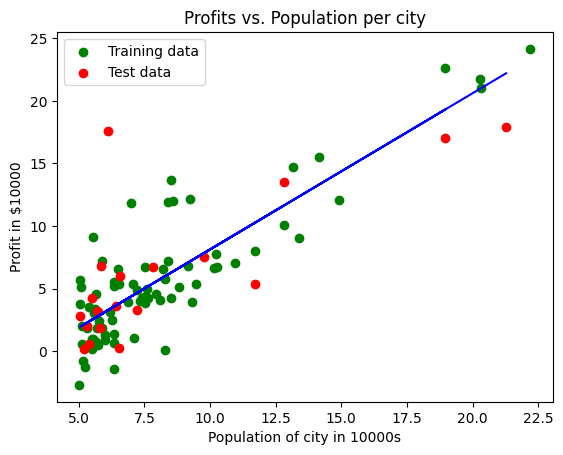

In [67]:
plt.plot(x_test, predicted_y, color='blue')
plt.scatter(x_train, y_train, marker='o', color='green', label='Training data')
plt.scatter(x_test, y_test, marker='o', color='red', label='Test data')
plt.title("Profits vs. Population per city")
plt.ylabel("Profit in $10000")
plt.xlabel("Population of city in 10000s")
plt.legend()
plt.show()